# Importing Libraries and Dataset

In [1164]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits import mplot3d

from plotly.offline import download_plotlyjs, init_notebook_mode
from plotly.offline import plot, iplot
import plotly.graph_objects as go

In [1165]:
path = r'C:\Users\david\Desktop\Machine Learning - Achievement 1'

In [1166]:
climate = pd.read_pickle(os.path.join(path, 'Data Sets', 'climate_data_scaled.pkl'))

In [1167]:
climate.head()

id      DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0   0  19600101      1           0.660514          -0.02793        0.826097   
1   1  19600102      1           0.244897          -0.02793        0.735760   
2   2  19600103      1           1.076130          -0.02793        1.277781   
3   3  19600104      1          -1.001953          -0.02793        1.458455   
4   4  19600105      1           0.244897          -0.02793        1.729466   

   BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0       -0.001949               -1.101066            -0.265148   
1       -0.001949               -1.058108             1.658760   
2       -0.001949               -1.251420             0.155707   
3       -0.001949               -0.821838            -0.445514   
4       -0.001949               -0.746661            -0.164944   

   BASEL_snow_depth  ...  VALENTIA_cloud_cover  VALENTIA_humidity  \
0         -0.179228  ...             -0.443701           0.761754   
1         -0.179228  ...              0.783085           1.183580   
2         -0.179228  ...              0.783085           1.183580   
3         -0.179228  ...              0.783085           0.480538   
4         -0.179228  ...             -1.670486          -0.363113   

   VALENTIA_pressure  VALENTIA_global_radiation  VALENTIA_precipitation  \
0          -1.299744                  -0.806427               -0.088407   
1          -1.262455                  -1.042055                0.503361   
2          -0.432779                  -1.136306               -0.396127   
3           0.387574                  -1.183432                0.669056   
4           1.729970                  -0.794645               -0.490810   

   VALENTIA_snow_depth  VALENTIA_sunshine  VALENTIA_temp_mean  \
0            -0.024706           0.372147           -0.668215   
1            -0.024706          -0.829285           -0.548046   
2            -0.024706          -1.009500           -0.067372   
3            -0.024706          -1.039536           -0.998679   
4            -0.024706           0.672505           -1.509396   

   VALENTIA_temp_min  VALENTIA_temp_max  
0          -0.519743          -0.752237  
1          -0.629054          -0.407141  
2           0.054135          -0.177078  
3          -0.164486          -0.838511  
4          -1.339569          -1.471186  

[5 rows x 171 columns]

# Creating a Boxplot of Mean Temperatures

In [1169]:
# Reducing climate data into just mean temperatures
df = climate[['DATE', 'MONTH','BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'DUSSELDORF_temp_mean',
 'GDANSK_temp_mean',
 'HEATHROW_temp_mean',
 'KASSEL_temp_mean',
 'LJUBLJANA_temp_mean',
 'MAASTRICHT_temp_mean',
 'MADRID_temp_mean',
 'MUNCHENB_temp_mean',
 'OSLO_temp_mean',
 'ROMA_temp_mean',
 'SONNBLICK_temp_mean',
 'STOCKHOLM_temp_mean',
 'TOURS_temp_mean',
 'VALENTIA_temp_mean']].copy()

In [1170]:
df.head()

DATE  MONTH  BASEL_temp_mean  BELGRADE_temp_mean  BUDAPEST_temp_mean  \
0  19600101      1        -0.528623           -1.016876           -1.099163   
1  19600102      1        -0.582946           -1.107669           -1.110927   
2  19600103      1        -0.257010           -1.084971           -1.063873   
3  19600104      1        -0.555784           -1.209812           -1.146217   
4  19600105      1        -1.003946           -1.209812           -1.087400   

   DEBILT_temp_mean  DUSSELDORF_temp_mean  GDANSK_temp_mean  \
0         -0.114356             -0.105836         -0.927601   
1         -0.367511             -0.370915         -0.825294   
2         -0.509912             -0.532908         -0.940389   
3         -0.525734             -0.577088         -1.042696   
4         -0.320045             -0.444548         -0.978754   

   HEATHROW_temp_mean  KASSEL_temp_mean  LJUBLJANA_temp_mean  \
0           -0.106469         -0.182904            -1.370824   
1           -0.892676         -0.212437            -1.043881   
2           -0.490837         -0.389635            -0.741156   
3           -0.316124         -0.493001            -0.910682   
4           -0.403481         -0.552067            -0.862246   

   MAASTRICHT_temp_mean  MADRID_temp_mean  MUNCHENB_temp_mean  OSLO_temp_mean  \
0             -0.097084         -0.988280           -0.265742       -0.186575   
1             -0.232112         -0.691740           -0.353714       -0.368598   
2             -0.487164         -0.853490           -0.403983       -0.550620   
3             -0.472161         -0.624345           -0.642763       -0.417137   
4             -0.307127         -0.381721           -0.906678       -0.332193   

   ROMA_temp_mean  SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
0       -1.280450            -0.124331            -0.391072        -0.257321   
1       -0.539569            -0.650834            -0.415953        -0.335759   
2       -0.876333            -0.650834            -0.615003        -0.210258   
3       -0.775304            -0.943336            -0.764290        -0.069069   
4       -0.926848            -0.621584            -0.503037        -0.037694   

   VALENTIA_temp_mean  
0           -0.668215  
1           -0.548046  
2           -0.067372  
3           -0.998679  
4           -1.509396

In [1171]:
# Making a copy dataframe without the unscaled data
notemp = df.drop(['DATE','MONTH'], axis=1)

In [1172]:
notemp.head()

BASEL_temp_mean  BELGRADE_temp_mean  BUDAPEST_temp_mean  DEBILT_temp_mean  \
0        -0.528623           -1.016876           -1.099163         -0.114356   
1        -0.582946           -1.107669           -1.110927         -0.367511   
2        -0.257010           -1.084971           -1.063873         -0.509912   
3        -0.555784           -1.209812           -1.146217         -0.525734   
4        -1.003946           -1.209812           -1.087400         -0.320045   

   DUSSELDORF_temp_mean  GDANSK_temp_mean  HEATHROW_temp_mean  \
0             -0.105836         -0.927601           -0.106469   
1             -0.370915         -0.825294           -0.892676   
2             -0.532908         -0.940389           -0.490837   
3             -0.577088         -1.042696           -0.316124   
4             -0.444548         -0.978754           -0.403481   

   KASSEL_temp_mean  LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  \
0         -0.182904            -1.370824             -0.097084   
1         -0.212437            -1.043881             -0.232112   
2         -0.389635            -0.741156             -0.487164   
3         -0.493001            -0.910682             -0.472161   
4         -0.552067            -0.862246             -0.307127   

   MADRID_temp_mean  MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
0         -0.988280           -0.265742       -0.186575       -1.280450   
1         -0.691740           -0.353714       -0.368598       -0.539569   
2         -0.853490           -0.403983       -0.550620       -0.876333   
3         -0.624345           -0.642763       -0.417137       -0.775304   
4         -0.381721           -0.906678       -0.332193       -0.926848   

   SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
0            -0.124331            -0.391072        -0.257321   
1            -0.650834            -0.415953        -0.335759   
2            -0.650834            -0.615003        -0.210258   
3            -0.943336            -0.764290        -0.069069   
4            -0.621584            -0.503037        -0.037694   

   VALENTIA_temp_mean  
0           -0.668215  
1           -0.548046  
2           -0.067372  
3           -0.998679  
4           -1.509396

In [1173]:
notemp.boxplot(figsize=(15,15))
plt.xticks(rotation=90)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18]),
 [Text(1, 0, 'BASEL_temp_mean'),
  Text(2, 0, 'BELGRADE_temp_mean'),
  Text(3, 0, 'BUDAPEST_temp_mean'),
  Text(4, 0, 'DEBILT_temp_mean'),
  Text(5, 0, 'DUSSELDORF_temp_mean'),
  Text(6, 0, 'GDANSK_temp_mean'),
  Text(7, 0, 'HEATHROW_temp_mean'),
  Text(8, 0, 'KASSEL_temp_mean'),
  Text(9, 0, 'LJUBLJANA_temp_mean'),
  Text(10, 0, 'MAASTRICHT_temp_mean'),
  Text(11, 0, 'MADRID_temp_mean'),
  Text(12, 0, 'MUNCHENB_temp_mean'),
  Text(13, 0, 'OSLO_temp_mean'),
  Text(14, 0, 'ROMA_temp_mean'),
  Text(15, 0, 'SONNBLICK_temp_mean'),
  Text(16, 0, 'STOCKHOLM_temp_mean'),
  Text(17, 0, 'TOURS_temp_mean'),
  Text(18, 0, 'VALENTIA_temp_mean')])

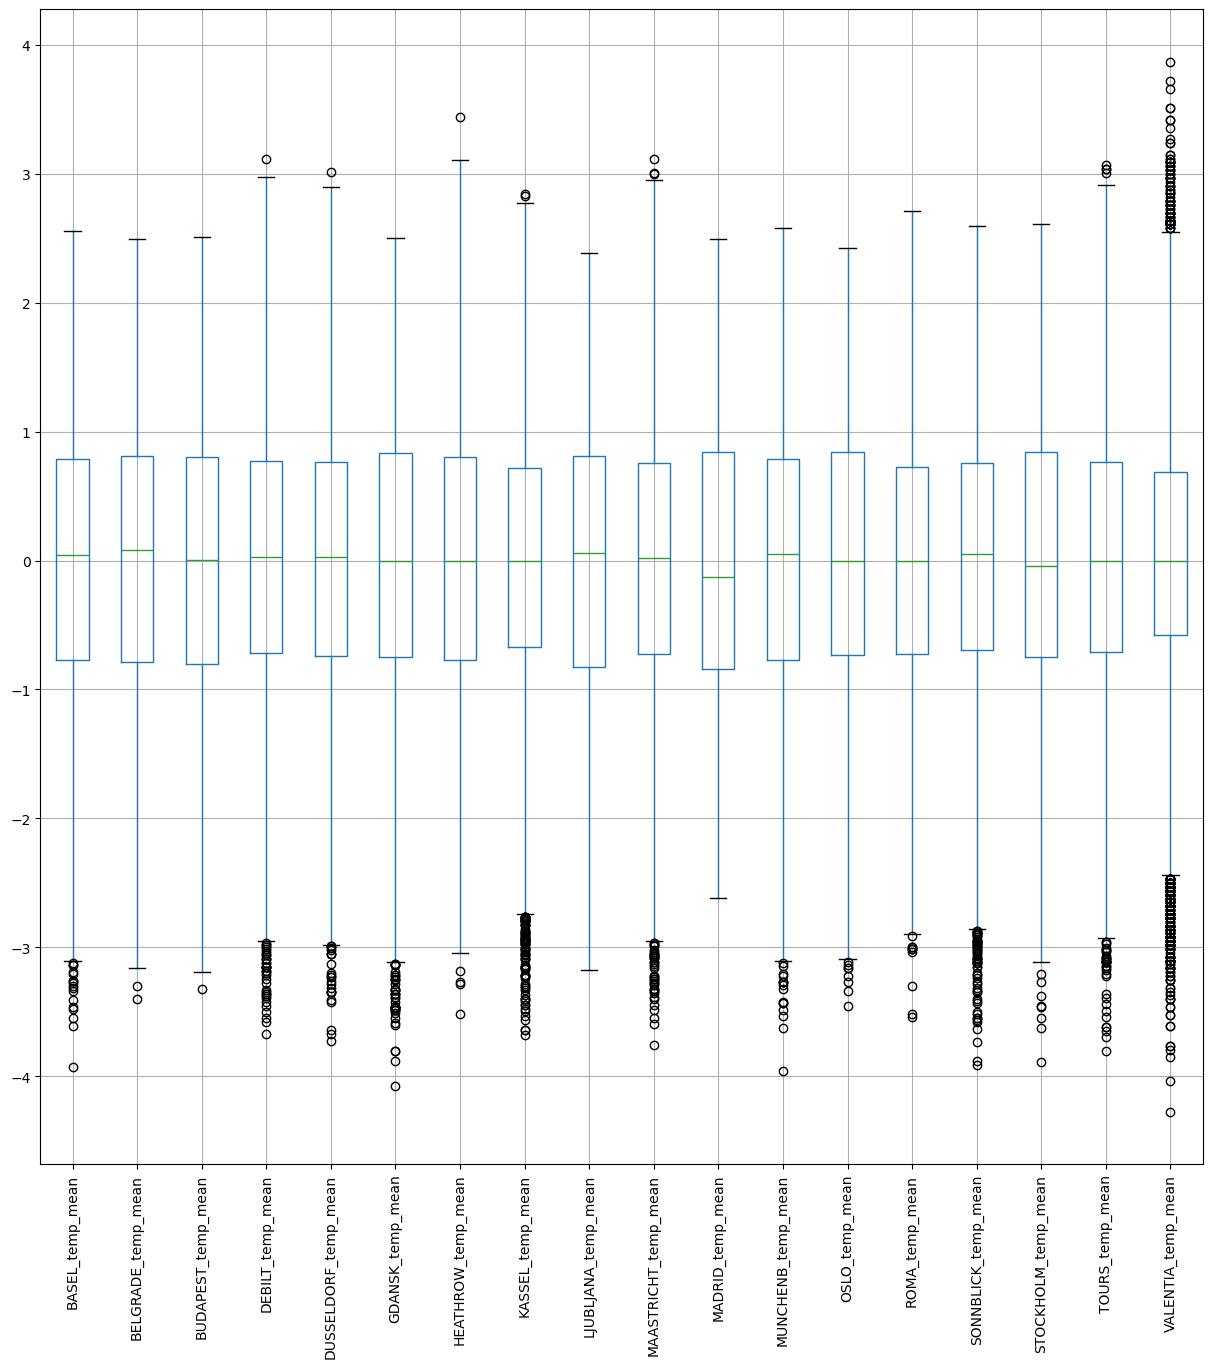

In [1174]:
plt.show()

# Analyzing Climate Data from Dusseldorf Weather Station in 1960

### Creating data frame containing climate data from 1960

In [1177]:
dfyear = df[df['DATE'].astype(str).str.contains('1960')]
dfyear.head()

DATE  MONTH  BASEL_temp_mean  BELGRADE_temp_mean  BUDAPEST_temp_mean  \
0  19600101      1        -0.528623           -1.016876           -1.099163   
1  19600102      1        -0.582946           -1.107669           -1.110927   
2  19600103      1        -0.257010           -1.084971           -1.063873   
3  19600104      1        -0.555784           -1.209812           -1.146217   
4  19600105      1        -1.003946           -1.209812           -1.087400   

   DEBILT_temp_mean  DUSSELDORF_temp_mean  GDANSK_temp_mean  \
0         -0.114356             -0.105836         -0.927601   
1         -0.367511             -0.370915         -0.825294   
2         -0.509912             -0.532908         -0.940389   
3         -0.525734             -0.577088         -1.042696   
4         -0.320045             -0.444548         -0.978754   

   HEATHROW_temp_mean  KASSEL_temp_mean  LJUBLJANA_temp_mean  \
0           -0.106469         -0.182904            -1.370824   
1           -0.892676         -0.212437            -1.043881   
2           -0.490837         -0.389635            -0.741156   
3           -0.316124         -0.493001            -0.910682   
4           -0.403481         -0.552067            -0.862246   

   MAASTRICHT_temp_mean  MADRID_temp_mean  MUNCHENB_temp_mean  OSLO_temp_mean  \
0             -0.097084         -0.988280           -0.265742       -0.186575   
1             -0.232112         -0.691740           -0.353714       -0.368598   
2             -0.487164         -0.853490           -0.403983       -0.550620   
3             -0.472161         -0.624345           -0.642763       -0.417137   
4             -0.307127         -0.381721           -0.906678       -0.332193   

   ROMA_temp_mean  SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
0       -1.280450            -0.124331            -0.391072        -0.257321   
1       -0.539569            -0.650834            -0.415953        -0.335759   
2       -0.876333            -0.650834            -0.615003        -0.210258   
3       -0.775304            -0.943336            -0.764290        -0.069069   
4       -0.926848            -0.621584            -0.503037        -0.037694   

   VALENTIA_temp_mean  
0           -0.668215  
1           -0.548046  
2           -0.067372  
3           -0.998679  
4           -1.509396

### Global Climate Statistics (1960)

In [1179]:
dfyear.describe()

DATE       MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
count  3.660000e+02  366.000000       366.000000          366.000000   
mean   1.960067e+07    6.513661        -0.102317           -0.032384   
std    3.457653e+02    3.455958         0.935826            0.920271   
min    1.960010e+07    1.000000        -3.190431           -2.401472   
25%    1.960040e+07    4.000000        -0.756099           -0.594120   
50%    1.960070e+07    7.000000        -0.053300            0.055618   
75%    1.960098e+07    9.750000         0.649499            0.662798   
max    1.960123e+07   12.000000         1.820830            1.843109   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
count          366.000000        366.000000            366.000000   
mean            -0.063919         -0.052666             -0.034416   
std              0.946637          0.910451              0.919531   
min             -2.416664         -2.645913             -2.874442   
25%             -0.675681         -0.668134             -0.661766   
50%             -0.005167         -0.011511             -0.002750   
75%              0.744750          0.692578              0.715174   
max              1.806397          1.847601              1.970619   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
count        366.000000          366.000000        366.000000   
mean          -0.067706           -0.103366          0.026208   
std            0.978767            0.919195          0.964448   
min           -2.922584           -2.307849         -3.446307   
25%           -0.825294           -0.840262         -0.666507   
50%           -0.096358           -0.071526          0.082894   
75%            0.757265            0.714681          0.802762   
max            1.834684            1.745486          2.002543   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
count           366.000000            366.000000        366.000000   
mean             -0.074499             -0.063840         -0.130480   
std               0.906193              0.902235          0.979590   
min              -2.714923             -3.247725         -2.322710   
25%              -0.738129             -0.712209         -0.890557   
50%              -0.002507              0.052946         -0.294107   
75%               0.699815              0.649317          0.787590   
max               1.668536              1.688278          1.936682   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
count          366.000000      366.000000      366.000000   
mean            -0.101680       -0.078422        0.092554   
std              0.938523        0.998018        1.002362   
min             -3.017997       -2.249500       -2.408610   
25%             -0.777863       -0.738711       -0.653227   
50%             -0.001827       -0.168373       -0.009165   
75%              0.626541        0.869157        1.110576   
max              1.858144        1.985564        1.952486   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
count           366.000000           366.000000       366.000000   
mean             -0.175958            -0.092804        -0.059940   
std               0.884235             0.988702         0.944029   
min              -3.502727            -2.356684        -3.112470   
25%              -0.764178            -0.798501        -0.692653   
50%              -0.124331            -0.179582         0.032900   
75%               0.475298             0.877867         0.683937   
max               1.967058             1.686504         1.938947   

       VALENTIA_temp_mean  
count          366.000000  
mean            -0.057276  
std              1.127911  
min             -2.951420  
25%             -0.848468  
50%             -0.037330  
75%              0.893978  
max              2.606381

### Removing non-numerical/non-scaled data


In [1181]:
# Creating dataframe containing scaled data from 1960
notempyear = dfyear.drop(['DATE','MONTH'], axis=1)

### Plotting weather data for all stations in 1960


In [1183]:
#X = weather station
#Y = day of the year
#Z = temperature

fig = go.Figure(data=[go.Surface(z=notempyear.values)])
fig.update_layout(title='Temperatures over time', autosize=False,
                  width=600, height=600)
fig.show()

# Click and drag the graph below to rotate

In [1184]:
# Creating an index of days for a scatterplot. 1960 is a leap year, so 366 rows were created.
i = np.arange(0.01,3.67,0.01)
index = pd.DataFrame(data = i, columns = ['index'])
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
361   3.62
362   3.63
363   3.64
364   3.65
365   3.66

[366 rows x 1 columns]

In [1185]:
n_rows = dfyear.shape[0]
n_rows

366

### Dusseldorf Scatterplot (1960) - Average Temp Per Day

In [1187]:
X = index.to_numpy().reshape(n_rows,1)
ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=dfyear['DUSSELDORF_temp_mean'].to_numpy().reshape(n_rows,1)

In [1188]:
X.shape, y.shape

((366, 2), (366, 1))

In [1189]:
plt.scatter(x=index['index'], y=dfyear['DUSSELDORF_temp_mean'])
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');

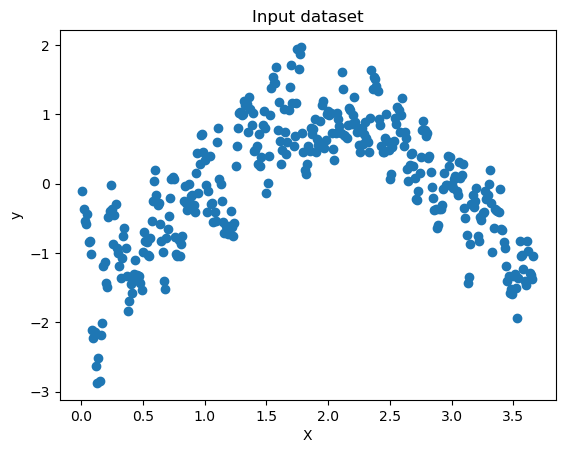

In [1190]:
plt.show()

In [1191]:
dfyear['DUSSELDORF_temp_mean'].min()

-2.874442280830017

In [1192]:
dfyear['DUSSELDORF_temp_mean'].max()

1.970618682756848

# Gradient Descent Model - Dusseldorf (1960)

In [1194]:
def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [1195]:
compute_cost(X,y)

array([0.4222054])

### Creation of Gradient Descent function

In [1197]:
def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [1198]:
%%time
#This runs the data through a gradiant descent for the starting conditions in 'theta_init.'

num_iterations= 500
theta_init=np.array([[1],[1]]) # first guess for theta0 and theta1
alpha=0.1 # step size
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 422 ms
Wall time: 412 ms


In [1199]:
theta

array([[-0.33601409],
       [ 0.16436084]])

### Plotting loss, theta0, and theta1.

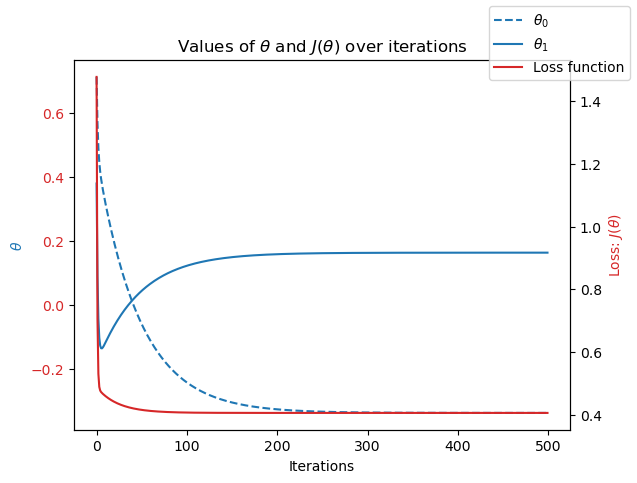

In [1201]:
# loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();
fig

Theta0 flattens out between -0.4 and -0.2

Theta1 flattens out between 0 and 0.2

Added/Subtracted 10 to the margins

In [1203]:
%%time
# theta range
theta0_vals = np.linspace(-10.4,9.8,100) # theta0 falls between these numbers
theta1_vals = np.linspace(-10,10.2,100) # theta1 falls between these numbers
                                
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: total: 2.52 s
Wall time: 2.53 s


### Plotting the Loss Function

In [1205]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

### Adding a line that tracks loss over iterations

In [1207]:
#Here is the same figure as above, with the line the loss function takes toward the minimum.

#X = Theta0
#Y - Theta1
#Z = Loss
#black line = path of loss function over the iterations.

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history, y=theta0_history, z=J_history, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history, theta1_history, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

### Optimizing model using updated x and y coordinates

In [1209]:
#Rerunning the optimization above with new X and Y coordinates

num_iterations=500
theta_init=np.array([[0.078],[-0.135]])
alpha= 0.1
theta1, J_history1, theta0_history1, theta1_history1 = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

In [1210]:
line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history1, y=theta0_history1, z=J_history1, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history1, theta1_history1, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

Loss has been lowered to 0.41

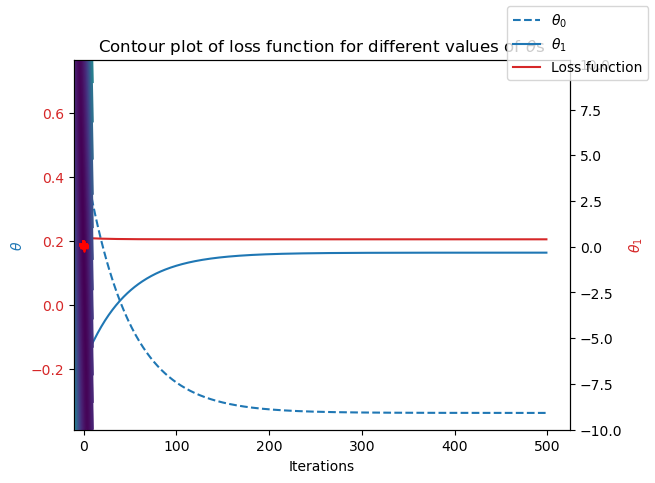

In [1212]:
#This plot shows the convergence similar to above, but only in the X/Y plane (there's no height)

plt.contour(theta0_vals, theta1_vals, J_vals, levels = np.logspace(0,3,50))
plt.xlabel('$\\theta_{0}$'); plt.ylabel("$\\theta_{1}$")
plt.title("Contour plot of loss function for different values of $\\theta$s");
plt.plot(theta0_history1, theta1_history1, 'r+');
plt.show()

# Gradient Descent Analysis - Stockholm in 1990

In [1214]:
dfyear = df[df['DATE'].astype(str).str.contains('1990')]

In [1215]:
dfyear.head()

DATE  MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
10958  19900101      1        -1.696559           -1.584333   
10959  19900102      1        -1.655817           -1.538937   
10960  19900103      1        -1.710140           -1.527588   
10961  19900104      1        -1.506430           -1.788618   
10962  19900105      1        -1.411366           -2.083696   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
10958           -1.369721         -1.506712             -1.490139   
10959           -1.428538         -1.427601             -1.269240   
10960           -1.440302         -1.301023             -1.460686   
10961           -1.616753         -1.538357             -1.401779   
10962           -1.687333         -1.063690             -1.107247   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
10958         -1.298463           -1.172216         -1.541424   
10959         -1.081061           -1.049918         -1.452825   
10960         -1.196156           -1.259573         -1.570958   
10961         -1.515865           -1.032446         -1.570958   
10962         -1.592595           -0.805320         -1.408526   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
10958            -1.479805             -1.447359         -0.974801   
10959            -1.528241             -1.342338         -1.136550   
10960            -1.382933             -1.387347         -1.069155   
10961            -1.516132             -1.642398         -1.136550   
10962            -1.794639             -1.237316         -1.082634   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
10958           -1.811529       -1.594218       -1.937140   
10959           -1.522480       -1.497139       -1.566700   
10960           -1.359104       -1.703431       -1.600376   
10961           -1.710990       -1.023880       -1.583538   
10962           -1.447075       -0.878261       -1.886626   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
10958            -0.460708            -1.274353        -1.528019   
10959            -0.782460            -1.448521        -1.292705   
10960            -0.972586            -1.361437        -1.261329   
10961            -1.001836            -0.938458        -1.386830   
10962            -0.870210            -0.963339        -1.135828   

       VALENTIA_temp_mean  
10958           -1.148890  
10959           -1.028721  
10960           -0.878510  
10961           -1.269058  
10962           -0.397835

In [1216]:
notempyear = dfyear.drop(['DATE','MONTH'], axis=1)

In [1217]:
notempyear.head()

BASEL_temp_mean  BELGRADE_temp_mean  BUDAPEST_temp_mean  \
10958        -1.696559           -1.584333           -1.369721   
10959        -1.655817           -1.538937           -1.428538   
10960        -1.710140           -1.527588           -1.440302   
10961        -1.506430           -1.788618           -1.616753   
10962        -1.411366           -2.083696           -1.687333   

       DEBILT_temp_mean  DUSSELDORF_temp_mean  GDANSK_temp_mean  \
10958         -1.506712             -1.490139         -1.298463   
10959         -1.427601             -1.269240         -1.081061   
10960         -1.301023             -1.460686         -1.196156   
10961         -1.538357             -1.401779         -1.515865   
10962         -1.063690             -1.107247         -1.592595   

       HEATHROW_temp_mean  KASSEL_temp_mean  LJUBLJANA_temp_mean  \
10958           -1.172216         -1.541424            -1.479805   
10959           -1.049918         -1.452825            -1.528241   
10960           -1.259573         -1.570958            -1.382933   
10961           -1.032446         -1.570958            -1.516132   
10962           -0.805320         -1.408526            -1.794639   

       MAASTRICHT_temp_mean  MADRID_temp_mean  MUNCHENB_temp_mean  \
10958             -1.447359         -0.974801           -1.811529   
10959             -1.342338         -1.136550           -1.522480   
10960             -1.387347         -1.069155           -1.359104   
10961             -1.642398         -1.136550           -1.710990   
10962             -1.237316         -1.082634           -1.447075   

       OSLO_temp_mean  ROMA_temp_mean  SONNBLICK_temp_mean  \
10958       -1.594218       -1.937140            -0.460708   
10959       -1.497139       -1.566700            -0.782460   
10960       -1.703431       -1.600376            -0.972586   
10961       -1.023880       -1.583538            -1.001836   
10962       -0.878261       -1.886626            -0.870210   

       STOCKHOLM_temp_mean  TOURS_temp_mean  VALENTIA_temp_mean  
10958            -1.274353        -1.528019           -1.148890  
10959            -1.448521        -1.292705           -1.028721  
10960            -1.361437        -1.261329           -0.878510  
10961            -0.938458        -1.386830           -1.269058  
10962            -0.963339        -1.135828           -0.397835

In [1218]:
i = np.arange(0.01,3.66,0.01)
index = pd.DataFrame(data = i, columns = ['index'])
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
360   3.61
361   3.62
362   3.63
363   3.64
364   3.65

[365 rows x 1 columns]

In [1219]:
n_rows = dfyear.shape[0]
n_rows

365

In [1220]:
X = index.to_numpy().reshape(n_rows,1)
ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=dfyear['STOCKHOLM_temp_mean'].to_numpy().reshape(n_rows,1)

In [1221]:
%%time
#This runs the data through a gradiant descent for the starting conditions in 'theta_init.'

num_iterations= 500
theta_init=np.array([[1],[1]]) # first guess for theta0 and theta1
alpha=0.1 # step size
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 375 ms
Wall time: 382 ms


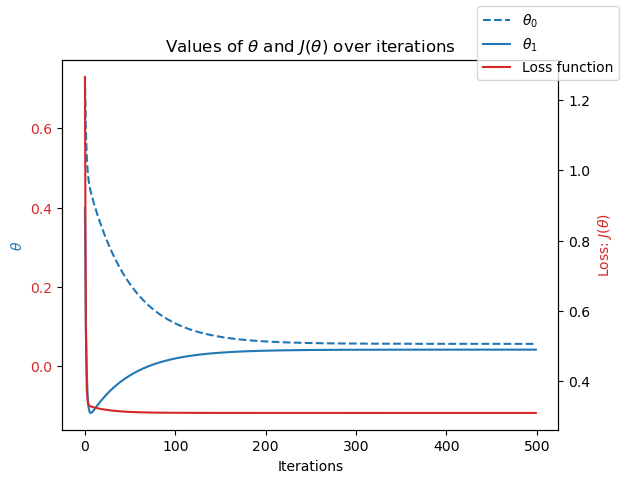

In [1222]:
# loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();
fig

In [1223]:
theta

array([[0.05592035],
       [0.04135758]])

In [1224]:
%%time
# theta range
theta0_vals = np.linspace(-10,10.2,100) # theta0 falls between these numbers
theta1_vals = np.linspace(-10,10.2,100) # theta1 falls between these numbers
                                
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: total: 2.67 s
Wall time: 2.67 s


In [1225]:
#Here is the same figure as above, with the line the loss function takes toward the minimum.

#X = Theta0
#Y - Theta1
#Z = Loss
#black line = path of loss function over the iterations.

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history, y=theta0_history, z=J_history, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history, theta1_history, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

# Gradient Descent Analysis - Oslo in 2000

In [1227]:
dfyear = df[df['DATE'].astype(str).str.contains('2000')]

In [1228]:
dfyear.head()

DATE  MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
14610  20000101      1        -1.017527           -1.720523   
14611  20000102      1        -0.922462           -1.572984   
14612  20000103      1        -1.112591           -1.550286   
14613  20000104      1        -0.881720           -1.584333   
14614  20000105      1        -0.596526           -1.527588   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
14610           -1.957892         -0.620667             -0.959981   
14611           -1.804967         -0.430800             -0.621268   
14612           -1.475592         -0.256756             -0.444548   
14613           -1.499119         -0.573200             -0.429822   
14614           -1.357958         -0.889645             -0.812714   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
14610         -1.119426           -0.735435         -0.832631   
14611         -1.068273           -0.578193         -1.009829   
14612         -0.620680           -0.316124         -0.832631   
14613         -0.556739           -0.735435         -0.640666   
14614         -0.786929           -0.840262         -1.009829   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
14610            -1.879402             -0.682203         -1.284820   
14611            -1.407151             -0.592185         -1.338737   
14612            -1.334497             -0.502167         -1.540923   
14613            -1.734094             -0.427152         -1.433090   
14614            -1.661440             -0.742216         -1.931817   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
14610           -0.919246       -1.387925       -0.000746   
14611           -0.894111       -0.878261       -1.886626   
14612           -1.183161       -0.635564       -1.953979   
14613           -0.655331       -0.526351       -1.583538   
14614           -0.466820       -0.866127       -1.751920   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
14610            -1.484464            -1.199710        -0.492635   
14611            -1.265088            -0.751849        -0.586761   
14612            -0.606959            -0.814052        -0.555386   
14613            -0.080455            -0.478156        -0.476948   
14614            -0.372957            -0.988220        -0.571074   

       VALENTIA_temp_mean  
14610           -1.239016  
14611           -0.337751  
14612           -0.638173  
14613           -0.788384  
14614           -0.908552

In [1229]:
notempyear = dfyear.drop(['DATE','MONTH'], axis=1)

In [1230]:
notempyear.head()

BASEL_temp_mean  BELGRADE_temp_mean  BUDAPEST_temp_mean  \
14610        -1.017527           -1.720523           -1.957892   
14611        -0.922462           -1.572984           -1.804967   
14612        -1.112591           -1.550286           -1.475592   
14613        -0.881720           -1.584333           -1.499119   
14614        -0.596526           -1.527588           -1.357958   

       DEBILT_temp_mean  DUSSELDORF_temp_mean  GDANSK_temp_mean  \
14610         -0.620667             -0.959981         -1.119426   
14611         -0.430800             -0.621268         -1.068273   
14612         -0.256756             -0.444548         -0.620680   
14613         -0.573200             -0.429822         -0.556739   
14614         -0.889645             -0.812714         -0.786929   

       HEATHROW_temp_mean  KASSEL_temp_mean  LJUBLJANA_temp_mean  \
14610           -0.735435         -0.832631            -1.879402   
14611           -0.578193         -1.009829            -1.407151   
14612           -0.316124         -0.832631            -1.334497   
14613           -0.735435         -0.640666            -1.734094   
14614           -0.840262         -1.009829            -1.661440   

       MAASTRICHT_temp_mean  MADRID_temp_mean  MUNCHENB_temp_mean  \
14610             -0.682203         -1.284820           -0.919246   
14611             -0.592185         -1.338737           -0.894111   
14612             -0.502167         -1.540923           -1.183161   
14613             -0.427152         -1.433090           -0.655331   
14614             -0.742216         -1.931817           -0.466820   

       OSLO_temp_mean  ROMA_temp_mean  SONNBLICK_temp_mean  \
14610       -1.387925       -0.000746            -1.484464   
14611       -0.878261       -1.886626            -1.265088   
14612       -0.635564       -1.953979            -0.606959   
14613       -0.526351       -1.583538            -0.080455   
14614       -0.866127       -1.751920            -0.372957   

       STOCKHOLM_temp_mean  TOURS_temp_mean  VALENTIA_temp_mean  
14610            -1.199710        -0.492635           -1.239016  
14611            -0.751849        -0.586761           -0.337751  
14612            -0.814052        -0.555386           -0.638173  
14613            -0.478156        -0.476948           -0.788384  
14614            -0.988220        -0.571074           -0.908552

In [1231]:
i = np.arange(0.01,3.67,0.01)
index = pd.DataFrame(data = i, columns = ['index'])
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
361   3.62
362   3.63
363   3.64
364   3.65
365   3.66

[366 rows x 1 columns]

In [1232]:
n_rows = dfyear.shape[0]
n_rows

366

In [1233]:
X = index.to_numpy().reshape(n_rows,1)
ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=dfyear['OSLO_temp_mean'].to_numpy().reshape(n_rows,1)

In [1234]:
%%time
#This runs the data through a gradiant descent for the starting conditions in 'theta_init.'

num_iterations= 500
theta_init=np.array([[1],[1]]) # first guess for theta0 and theta1
alpha=0.1 # step size
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 391 ms
Wall time: 426 ms


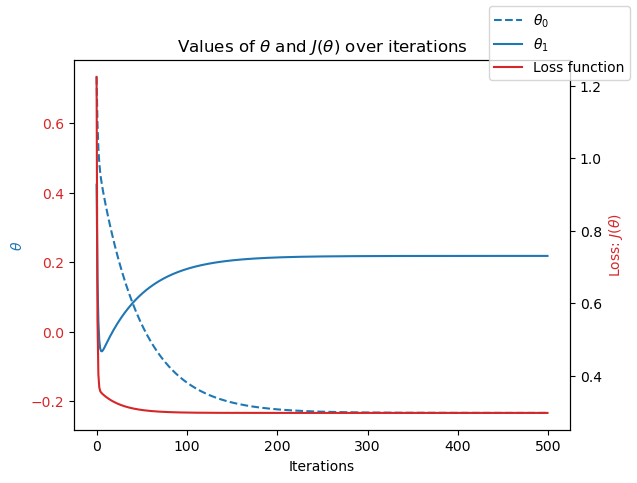

In [1235]:
# loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();
fig

In [1236]:
theta

array([[-0.2341717],
       [ 0.2178257]])

In [1237]:
%%time
# theta range
theta0_vals = np.linspace(-10,10.2,100) # theta0 falls between these numbers
theta1_vals = np.linspace(-10,10.2,100) # theta1 falls between these numbers
                                
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: total: 2.7 s
Wall time: 2.61 s


In [1238]:
#Here is the same figure as above, with the line the loss function takes toward the minimum.

#X = Theta0
#Y - Theta1
#Z = Loss
#black line = path of loss function over the iterations.

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history, y=theta0_history, z=J_history, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history, theta1_history, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

# Gradient Descent Analysis - Valentia in 1980

In [1240]:
dfyear = df[df['DATE'].astype(str).str.contains('1980')]

In [1241]:
dfyear.head()

DATE  MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
7305  19800101      1        -1.520011           -1.504889   
7306  19800102      1        -1.642237           -1.629730   
7307  19800103      1        -1.492850           -1.720523   
7308  19800104      1        -1.533592           -2.106394   
7309  19800105      1        -1.003946           -1.902110   

      BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
7305           -1.346195         -1.443423             -1.504866   
7306           -1.357958         -1.649112             -1.519592   
7307           -1.652043         -1.949735             -1.607952   
7308           -1.957892         -1.332668             -1.313420   
7309           -2.216686         -0.968756             -0.871621   

      GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
7305         -1.183368           -2.272906         -1.585724   
7306         -1.157791           -2.272906         -1.511891   
7307         -1.234521           -1.504171         -2.058253   
7308         -1.439135           -1.049918         -1.570958   
7309         -1.682114           -1.119803         -1.157495   

      LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
7305            -1.504023             -1.537377         -0.327805   
7306            -1.600895             -1.552380         -0.880448   
7307            -1.673549             -1.567383         -1.271341   
7308            -2.048928             -1.207310         -1.271341   
7309            -1.286061             -0.922252         -1.257862   

      MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  SONNBLICK_temp_mean  \
7305           -1.459643       -1.230172       -1.836111            -2.142594   
7306           -1.585317       -1.533543       -1.970817            -2.508221   
7307           -1.698423       -2.176691       -2.290743            -2.712972   
7308           -1.773827       -2.625680       -2.711698            -2.010968   
7309           -0.831274       -1.654892       -2.071846            -0.797085   

      STOCKHOLM_temp_mean  TOURS_temp_mean  VALENTIA_temp_mean  
7305            -1.025542        -1.324080           -1.899944  
7306            -1.423640        -1.606457           -1.299100  
7307            -1.635130        -1.731958           -0.457920  
7308            -1.697333        -1.010327           -0.908552  
7309            -1.075304        -0.790700           -0.938594

In [1242]:
notempyear = dfyear.drop(['DATE','MONTH'], axis=1)

In [1243]:
notempyear.head()

BASEL_temp_mean  BELGRADE_temp_mean  BUDAPEST_temp_mean  \
7305        -1.520011           -1.504889           -1.346195   
7306        -1.642237           -1.629730           -1.357958   
7307        -1.492850           -1.720523           -1.652043   
7308        -1.533592           -2.106394           -1.957892   
7309        -1.003946           -1.902110           -2.216686   

      DEBILT_temp_mean  DUSSELDORF_temp_mean  GDANSK_temp_mean  \
7305         -1.443423             -1.504866         -1.183368   
7306         -1.649112             -1.519592         -1.157791   
7307         -1.949735             -1.607952         -1.234521   
7308         -1.332668             -1.313420         -1.439135   
7309         -0.968756             -0.871621         -1.682114   

      HEATHROW_temp_mean  KASSEL_temp_mean  LJUBLJANA_temp_mean  \
7305           -2.272906         -1.585724            -1.504023   
7306           -2.272906         -1.511891            -1.600895   
7307           -1.504171         -2.058253            -1.673549   
7308           -1.049918         -1.570958            -2.048928   
7309           -1.119803         -1.157495            -1.286061   

      MAASTRICHT_temp_mean  MADRID_temp_mean  MUNCHENB_temp_mean  \
7305             -1.537377         -0.327805           -1.459643   
7306             -1.552380         -0.880448           -1.585317   
7307             -1.567383         -1.271341           -1.698423   
7308             -1.207310         -1.271341           -1.773827   
7309             -0.922252         -1.257862           -0.831274   

      OSLO_temp_mean  ROMA_temp_mean  SONNBLICK_temp_mean  \
7305       -1.230172       -1.836111            -2.142594   
7306       -1.533543       -1.970817            -2.508221   
7307       -2.176691       -2.290743            -2.712972   
7308       -2.625680       -2.711698            -2.010968   
7309       -1.654892       -2.071846            -0.797085   

      STOCKHOLM_temp_mean  TOURS_temp_mean  VALENTIA_temp_mean  
7305            -1.025542        -1.324080           -1.899944  
7306            -1.423640        -1.606457           -1.299100  
7307            -1.635130        -1.731958           -0.457920  
7308            -1.697333        -1.010327           -0.908552  
7309            -1.075304        -0.790700           -0.938594

In [1244]:
i = np.arange(0.01,3.67,0.01)
index = pd.DataFrame(data = i, columns = ['index'])
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
361   3.62
362   3.63
363   3.64
364   3.65
365   3.66

[366 rows x 1 columns]

In [1245]:
n_rows = dfyear.shape[0]
n_rows

366

In [1246]:
X = index.to_numpy().reshape(n_rows,1)
ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=dfyear['VALENTIA_temp_mean'].to_numpy().reshape(n_rows,1)

In [1247]:
%%time
#This runs the data through a gradiant descent for the starting conditions in 'theta_init.'

num_iterations= 500
theta_init=np.array([[1],[1]]) # first guess for theta0 and theta1
alpha=0.1 # step size
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 406 ms
Wall time: 493 ms


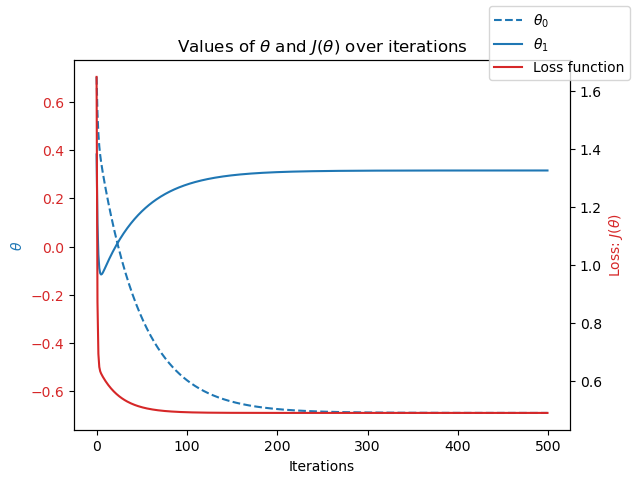

In [1248]:
# loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();
fig

In [1249]:
%%time
# theta range
theta0_vals = np.linspace(-10.8, 9.4,100) # theta0 falls between these numbers
theta1_vals = np.linspace(-9.8,10.4,100) # theta1 falls between these numbers
                                
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: total: 2.62 s
Wall time: 2.63 s


In [1250]:
#Here is the same figure as above, with the line the loss function takes toward the minimum.

#X = Theta0
#Y - Theta1
#Z = Loss
#black line = path of loss function over the iterations.

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history, y=theta0_history, z=J_history, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history, theta1_history, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

In [1251]:
theta

array([[-0.69190279],
       [ 0.31628142]])

# Analyzing Valentia, Oslo, and Stockholm temperatures over time

In [1253]:
df = climate[['DATE', 'MONTH','BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'DUSSELDORF_temp_mean',
 'GDANSK_temp_mean',
 'HEATHROW_temp_mean',
 'KASSEL_temp_mean',
 'LJUBLJANA_temp_mean',
 'MAASTRICHT_temp_mean',
 'MADRID_temp_mean',
 'MUNCHENB_temp_mean',
 'OSLO_temp_mean',
 'ROMA_temp_mean',
 'SONNBLICK_temp_mean',
 'STOCKHOLM_temp_mean',
 'TOURS_temp_mean',
 'VALENTIA_temp_mean']].copy()

In [1254]:
df2 = df[['DATE', 'VALENTIA_temp_mean', 'OSLO_temp_mean', 'STOCKHOLM_temp_mean']]

In [1255]:
df2

DATE  VALENTIA_temp_mean  OSLO_temp_mean  STOCKHOLM_temp_mean
0      19600101           -0.668215       -0.186575            -0.391072
1      19600102           -0.548046       -0.368598            -0.415953
2      19600103           -0.067372       -0.550620            -0.615003
3      19600104           -0.998679       -0.417137            -0.764290
4      19600105           -1.509396       -0.332193            -0.503037
...         ...                 ...             ...                  ...
22945  20221027           -0.007287        0.395898             0.517090
22946  20221028           -0.007287        0.541516             0.641496
22947  20221029           -0.007287        0.395898             0.716139
22948  20221030           -0.007287       -0.065226             0.019467
22949  20221031           -0.007287        0.335224             0.293160

[22950 rows x 4 columns]

In [1256]:
df2.loc[:, 'year'] = df2['DATE'].astype(str).str[:4].astype(int)

C:\Users\david\AppData\Local\Temp\ipykernel_8536\2345916496.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1257]:
df2

DATE  VALENTIA_temp_mean  OSLO_temp_mean  STOCKHOLM_temp_mean  year
0      19600101           -0.668215       -0.186575            -0.391072  1960
1      19600102           -0.548046       -0.368598            -0.415953  1960
2      19600103           -0.067372       -0.550620            -0.615003  1960
3      19600104           -0.998679       -0.417137            -0.764290  1960
4      19600105           -1.509396       -0.332193            -0.503037  1960
...         ...                 ...             ...                  ...   ...
22945  20221027           -0.007287        0.395898             0.517090  2022
22946  20221028           -0.007287        0.541516             0.641496  2022
22947  20221029           -0.007287        0.395898             0.716139  2022
22948  20221030           -0.007287       -0.065226             0.019467  2022
22949  20221031           -0.007287        0.335224             0.293160  2022

[22950 rows x 5 columns]

In [1258]:
yearly_avg = df2.groupby('year')[['VALENTIA_temp_mean', 'OSLO_temp_mean', 'STOCKHOLM_temp_mean']].mean().reset_index()


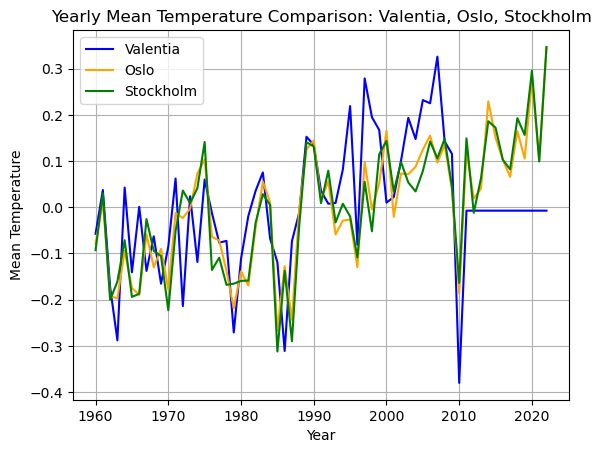

In [1338]:
plt.plot(yearly_avg['year'], yearly_avg['VALENTIA_temp_mean'], label='Valentia', color='blue')
plt.plot(yearly_avg['year'], yearly_avg['OSLO_temp_mean'], label='Oslo', color='orange')
plt.plot(yearly_avg['year'], yearly_avg['STOCKHOLM_temp_mean'], label='Stockholm', color='green')

plt.xlabel('Year')
plt.ylabel('Mean Temperature')
plt.title('Yearly Mean Temperature Comparison: Valentia, Oslo, Stockholm')
plt.legend()
plt.grid(True)

plt.show()